In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
x = df.iloc[:, [5, 9]]
y = df.iloc[:, 1]
x, y

(           Age     Fare
 0    22.000000   7.2500
 1    38.000000  71.2833
 2    26.000000   7.9250
 3    35.000000  53.1000
 4    35.000000   8.0500
 ..         ...      ...
 886  27.000000  13.0000
 887  19.000000  30.0000
 888  29.699118  23.4500
 889  26.000000  30.0000
 890  32.000000   7.7500
 
 [891 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

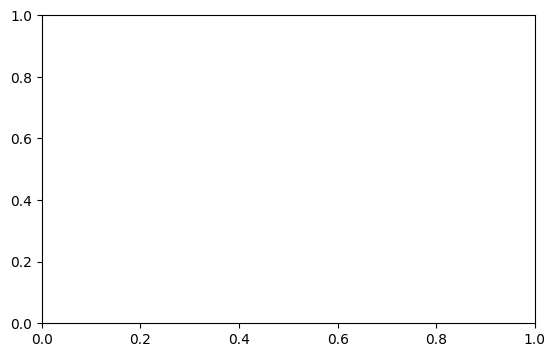

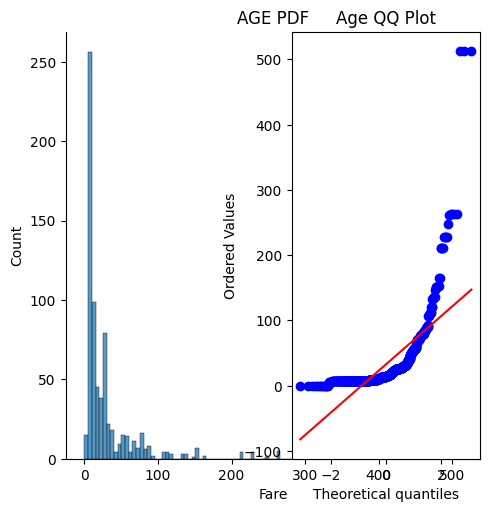

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.displot(x_train['Fare'])
plt.title("AGE PDF")

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title("Age QQ Plot")
plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

accuracy_score(y_test, y_pred)*100, accuracy_score(y_test, y_pred2)*100

(64.80446927374301, 67.59776536312849)

In [ ]:
trf = FunctionTransformer(func=np.log1p)

In [ ]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)
y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

accuracy_score(y_test, y_pred)*100, accuracy_score(y_test, y_pred2)*100

(68.15642458100558, 67.59776536312849)

In [ ]:
x_transformed = trf.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR", np.mean(cross_val_score(
    clf, x_transformed, y, scoring="accuracy", cv=10))*100)
print("DT", np.mean(cross_val_score(
    clf2, x_transformed, y, scoring="accuracy", cv=10))*100)

LR 67.80274656679151
DT 65.5518102372035


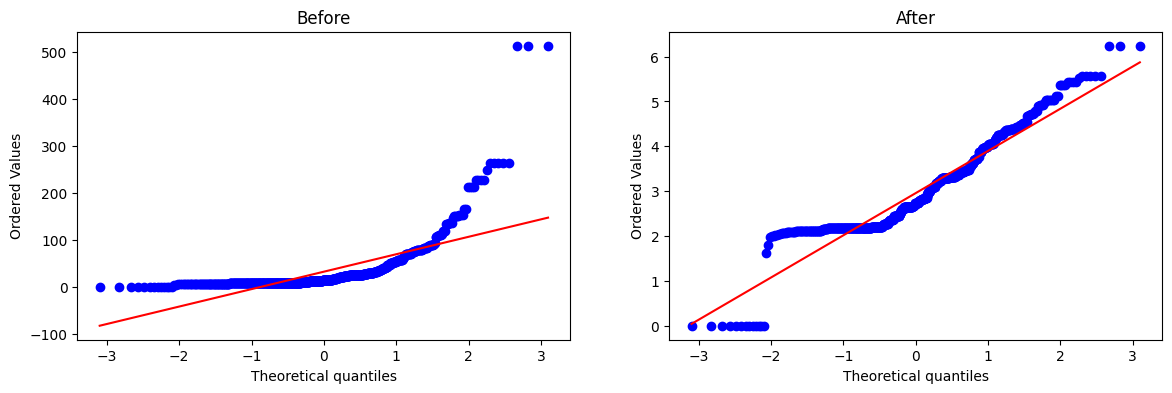

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title("Before")
plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist='norm', plot=plt)
plt.title("After")
plt.show()

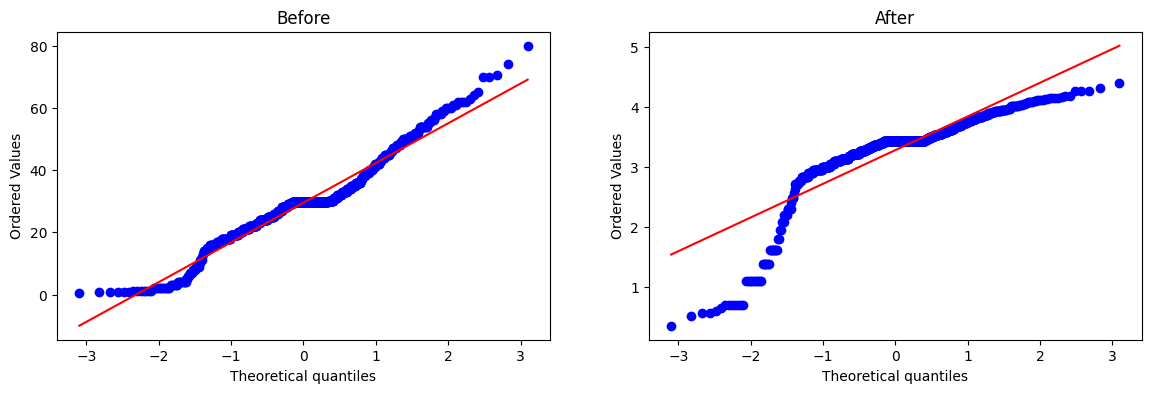

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title("Before")
plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist='norm', plot=plt)
plt.title("After")
plt.show()

In [ ]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Fare']),
],
    remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.fit_transform(x_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(x_train_transformed2, y_train)
clf2.fit(x_train_transformed2, y_train)
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

accuracy_score(y_test, y_pred)*100, accuracy_score(y_test, y_pred2)*100

(67.0391061452514, 68.15642458100558)

In [ ]:
x_transformed2 = trf2.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR", np.mean(cross_val_score(
    clf, x_transformed, y, scoring="accuracy", cv=10))*100)
print("DT", np.mean(cross_val_score(
    clf2, x_transformed, y, scoring="accuracy", cv=10))*100)

LR 67.80274656679151
DT 65.88264669163546


In [45]:
def apply_transform(transform):
    x = df.iloc[:, [5, 9]]
    y = df.iloc[:, 1]
    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['Fare']),
    ],
        remainder='passthrough')
    x_trans = trf.fit_transform(x)
    clf = LogisticRegression()    
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    stats.probplot(x['Age'], dist='norm', plot=plt)
    plt.title("Before")
    plt.subplot(122)
    stats.probplot(x_trans[:,0], dist='norm', plot=plt)
    plt.title("After")
    plt.show()
    print("Accuracy", np.mean(cross_val_score(
        clf, x_trans, y, scoring="accuracy", cv=10))*100)

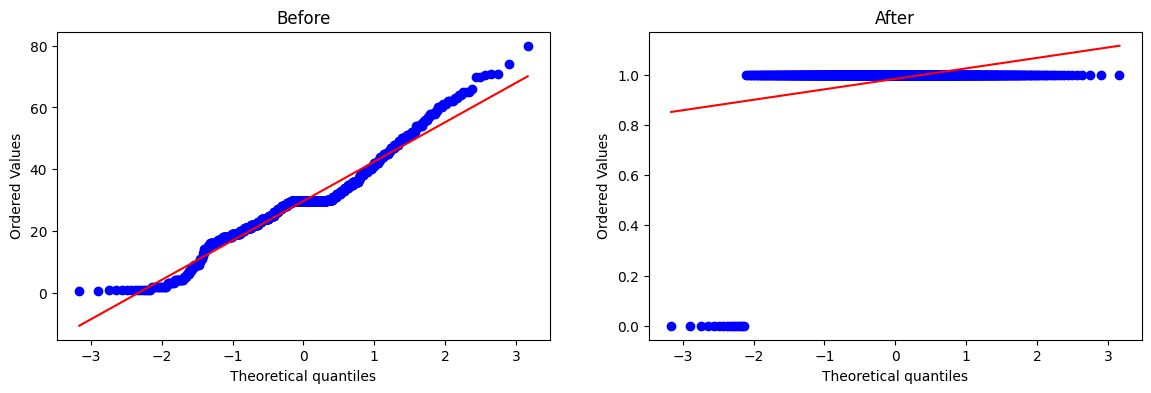

Accuracy 61.6167290886392


In [62]:
# apply_transform(np.log1p)
# apply_transform(lambda x:x)
# apply_transform(lambda x:x**2)
# apply_transform(lambda x:x//2)
# apply_transform(lambda x:x/2)
# apply_transform(lambda x:x**1/2)
# apply_transform(lambda x:x**1/3)
# apply_transform(lambda x:1/(x+0.001))
# apply_transform(np.sin)
# apply_transform(np.cos)
apply_transform(np.tanh)